In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv("T:/GIT HUB PROJECTS/MEDICAL COST INSURANCES/insurance.csv")

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
label_encode = LabelEncoder()

In [9]:
label =label_encode.fit_transform(df.sex)
df['sex'] =label

In [10]:
label1 = label_encode.fit_transform(df.smoker)
df['smoker'] =label1

In [11]:
label2 = label_encode.fit_transform(df.region)
df['region']=label2

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [13]:
sns.set()

C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

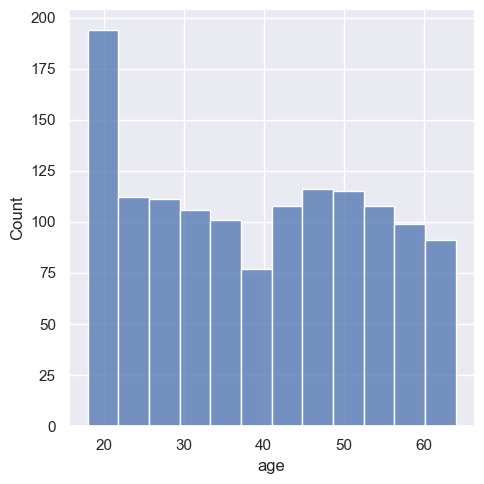

In [14]:
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.show()

C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x700 with 0 Axes>

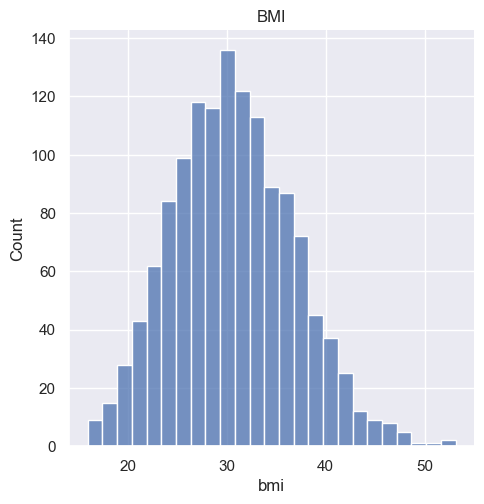

In [15]:
plt.figure(figsize=(7,7))
sns.displot(df['bmi'])
plt.title("BMI")
plt.show()

In [16]:
df['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [17]:
x= df.drop(columns = 'charges', axis =1)

In [18]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [19]:
y=df['charges']

In [20]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size =0.3 ,random_state =20)

In [22]:
model = LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_predict =model.predict(x_train)

In [25]:
r2_score = metrics.r2_score(y_train, y_predict)

In [26]:
print('R squared vale : ', r2_score)

R squared vale :  0.7410878121240619


In [27]:
y_predict1 =model.predict(x_test)

In [30]:
r2_score1 = metrics.r2_score(y_test,y_predict1)

In [31]:
print('R squared vale : ', r2_score1)

R squared vale :  0.7722020182243414


In [32]:
input = (31,1,25.74,0,1,0)

In [33]:
input_data = np.asarray(input)

In [34]:
input_data_reshaped = input_data.reshape(1,-1)

In [35]:
prediction = model.predict(input_data_reshaped)

C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
prediction

array([28656.0035213])

In [37]:
print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  28656.00352130063
